In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic = pd.read_csv(r"C:\Users\sahga\OneDrive\Desktop\tested.csv")

In [3]:
titanic.shape

(418, 12)

In [4]:
titanic.ndim

2

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
data_cleaned = titanic.dropna(subset=['Cabin','Age','Fare'])

In [11]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [12]:
data_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [14]:
# Performing lebel encoding.

data_cleaned['sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})

C:\Users\sahga\AppData\Local\Temp\ipykernel_6416\3790041098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})


In [15]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,0
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1


In [16]:
# Perform One Hot encoding.

data_cleaned = pd.get_dummies(data_cleaned, columns=['Embarked'], prefix='Embarked', drop_first=True)

In [17]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,Embarked_Q,Embarked_S
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,1,0,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,1,0,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,1,0,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,0,0,0
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,0,0,0
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,0,0,0
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,1,1,0


In [18]:
# Removed unwanted column.

data_cleaned = data_cleaned.drop(columns=['Cabin','Ticket','Sex','Name','PassengerId'])

In [19]:
data_cleaned

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked_Q,Embarked_S
12,1,1,23.0,1,0,82.2667,1,0,1
14,1,1,47.0,1,0,61.1750,1,0,1
24,1,1,48.0,1,3,262.3750,1,0,0
26,1,1,22.0,0,1,61.9792,1,0,0
28,0,1,41.0,0,0,30.5000,0,0,1
...,...,...,...,...,...,...,...,...,...
404,0,1,43.0,1,0,27.7208,0,0,0
405,0,2,20.0,0,0,13.8625,0,0,0
407,0,1,50.0,1,1,211.5000,0,0,0
411,1,1,37.0,1,0,90.0000,1,1,0


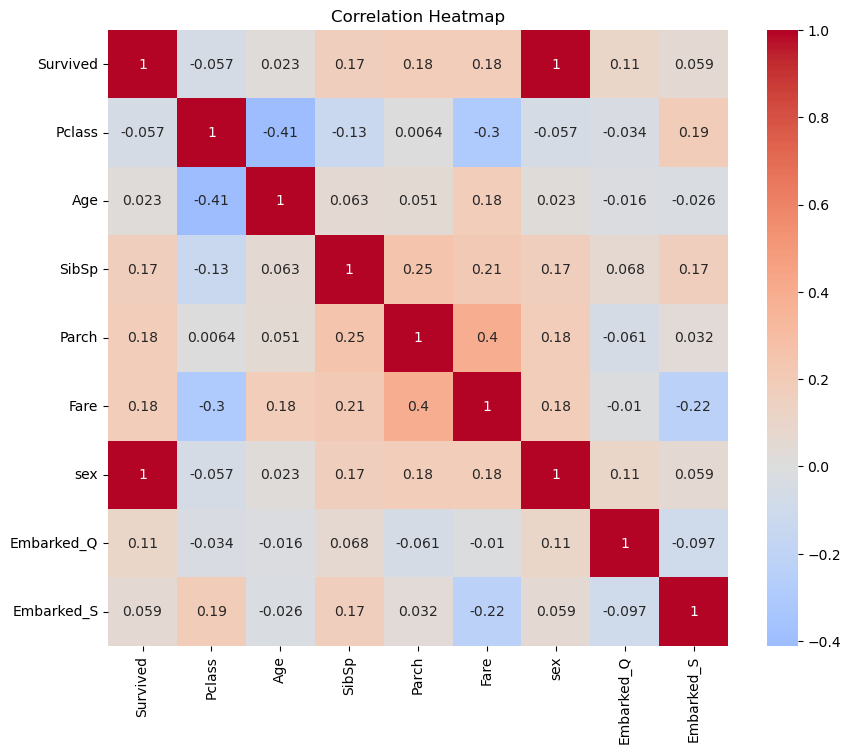

In [20]:
# create Heatmap.

plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

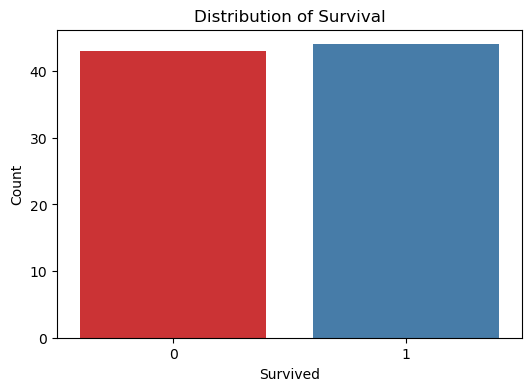

In [21]:
# Create bar graph between survived and not survived.

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data_cleaned, palette='Set1')
plt.title("Distribution of Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

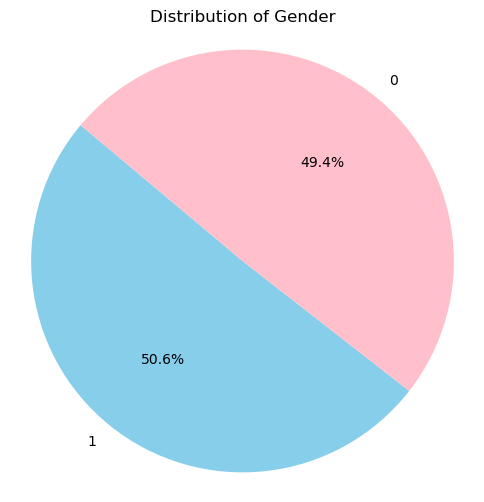

In [22]:
# Create Pie-chart for Gender distribution.

gender_counts = data_cleaned['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title("Distribution of Gender")
plt.axis('equal')  
plt.show()

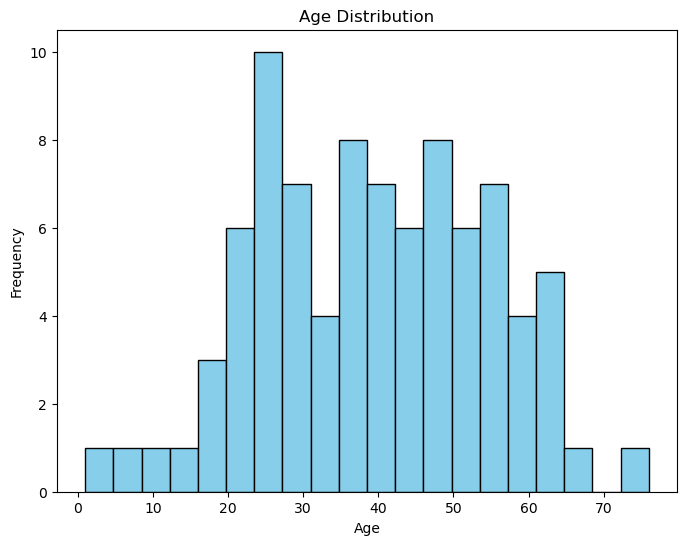

In [23]:
# Create a histogram for the distribution of ages.
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

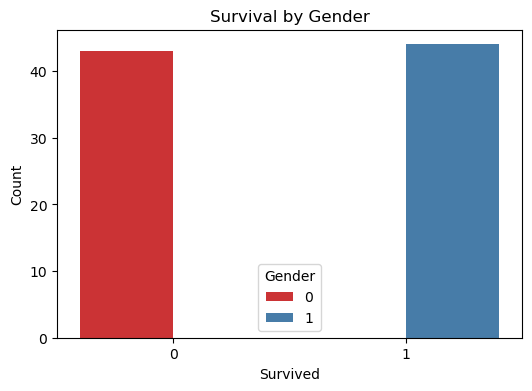

In [24]:
# Create a bar plot for survival based on gender.
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='sex', data=data_cleaned, palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

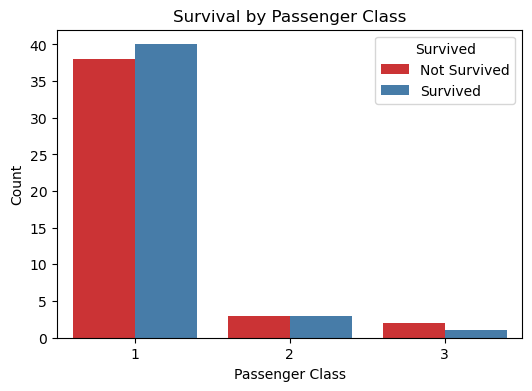

In [25]:
# Create a bar plot for survival based on passenger class (Pclass).
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=data_cleaned, palette='Set1')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

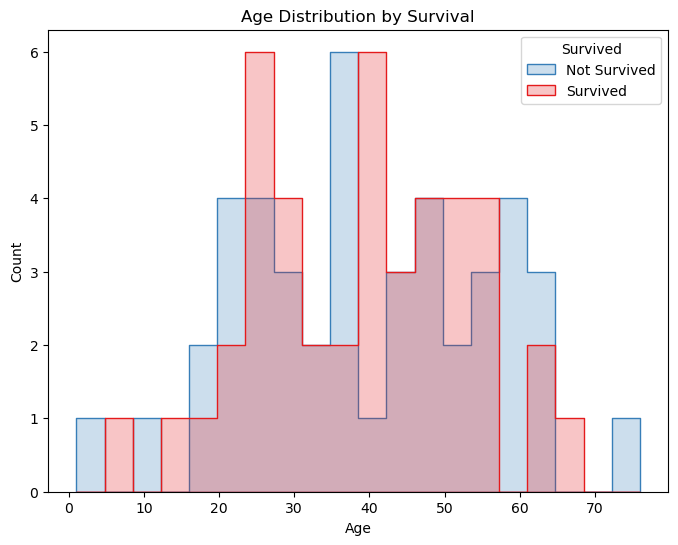

In [26]:
# Create a distribution plot for age based on survival.
plt.figure(figsize=(8, 6))
sns.histplot(data=data_cleaned, x='Age', hue='Survived', element='step', bins=20, palette='Set1')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

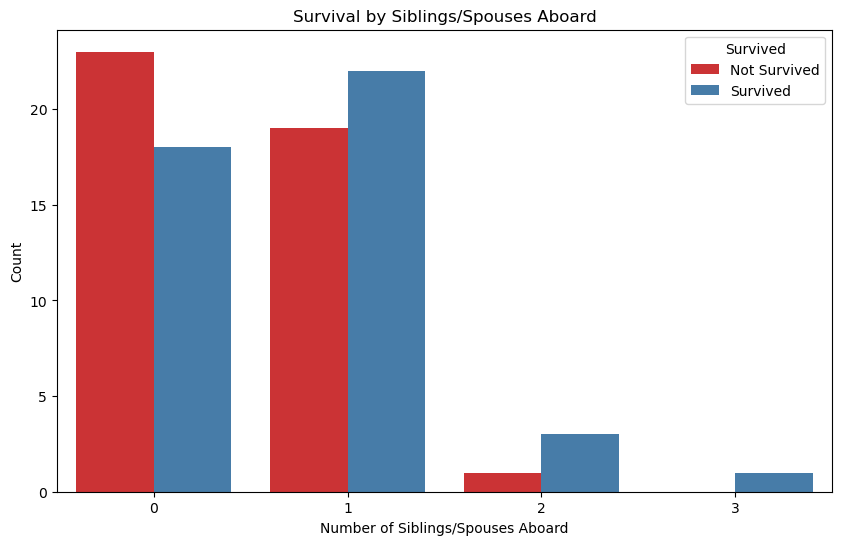

In [27]:
# Create a bar plot for survival based on the number of siblings/spouses aboard (SibSp).
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=data_cleaned, palette='Set1')
plt.title("Survival by Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

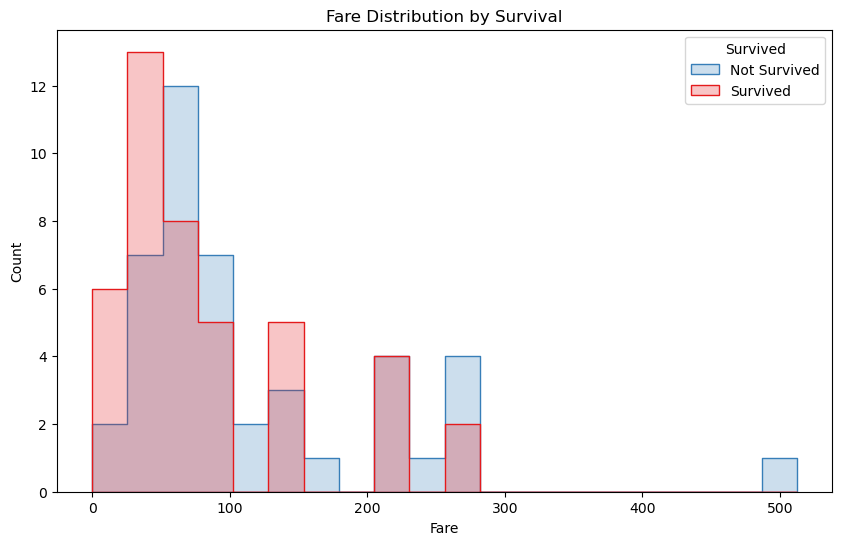

In [28]:
# Create a distribution plot for fare based on survival.
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='Fare', hue='Survived', element='step', bins=20, palette='Set1')
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

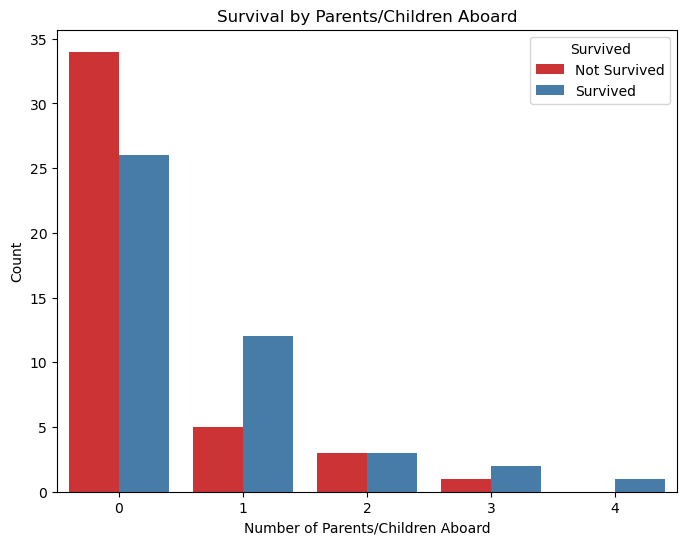

In [29]:
# Create a bar plot for survival based on the number of parents/children aboard (Parch).
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=data_cleaned, palette='Set1')
plt.title("Survival by Parents/Children Aboard")
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

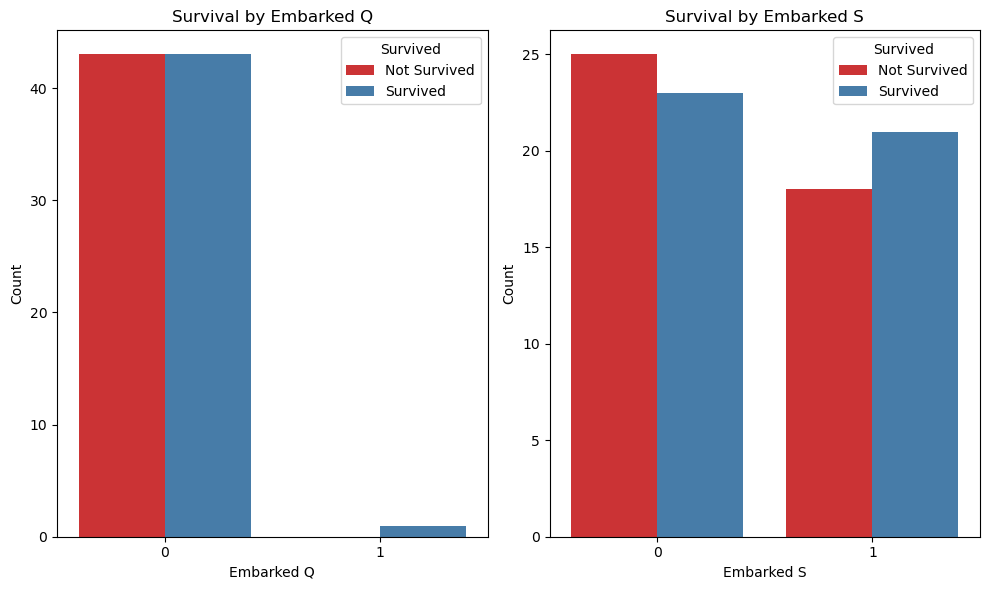

In [30]:
# Create bar plots for survival based on port of embarkation (Embarked_Q and Embarked_S).
plt.figure(figsize=(10, 6))

# Plot for Embarked_Q.
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked_Q', hue='Survived', data=data_cleaned, palette='Set1')
plt.title("Survival by Embarked Q")
plt.xlabel("Embarked Q")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

# Plot for Embarked_S.
plt.subplot(1, 2, 2)
sns.countplot(x='Embarked_S', hue='Survived', data=data_cleaned, palette='Set1')
plt.title("Survival by Embarked S")
plt.xlabel("Embarked S")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

plt.tight_layout()
plt.show()

In [31]:
# Separate features and target variable.
X = data_cleaned.drop('Survived', axis=1)
y = data_cleaned['Survived']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
# Standardize features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [33]:
# Make predictions.
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1f}")

# Accuracy is pretty good.

Accuracy: 1.0


In [36]:
# Checking the model.

input_data = [[1,23.0,1,0,82.2667,1,0,1]]

prediction = model.predict(input_data)
print(prediction)

[1]


In [35]:
# Survived[1]  and  Not Survived[0]